In [161]:
# convert data to pandas dataframe
import pandas as pd
import numpy as np

0.404


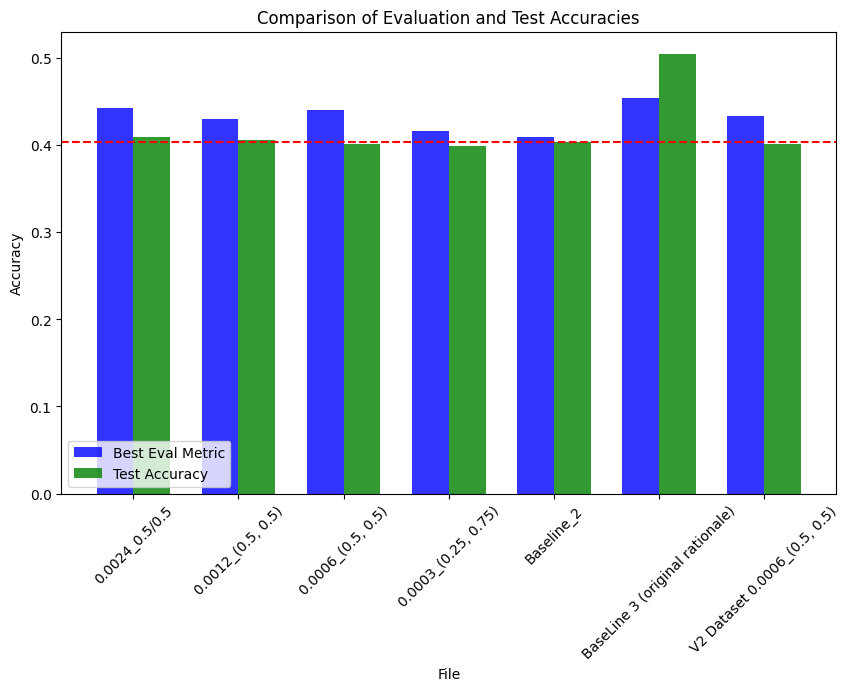

In [162]:
import json
import matplotlib.pyplot as plt

# Paths to your JSON files
file_paths = [
    '/Users/tompieper/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json', 
    # '/Users/tompieper/t5-small-logs/0.0003_(0.75, 0.25)/metrics.json', 
    '/Users/tompieper/t5-small-logs/0.0003_(0.25, 0.75)/metrics.json',
    # '/Users/tompieper/t5-small-logs/0.0024/metrics.json',
    '/Users/tompieper/metrics.json',
    '/Users/tompieper/v2.1/logs/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/new/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json'
    ]
file_names = [
    '0.0024_0.5/0.5', 
    '0.0012_(0.5, 0.5)', 
    '0.0006_(0.5, 0.5)', 
    # '0.0003_(0.75, 0.25)', 
    '0.0003_(0.25, 0.75)', 
    # 'Baseline',
    'Baseline_2',
    'BaseLine 3 (original rationale)',
    'V2 Dataset 0.0006_(0.5, 0.5)'
    ]
# Initialize lists to hold the metrics
eval_accuracies = []
test_accuracies = []
best_eval_accuracies = []
baseline = 0

# Loop through each file, read the data, and extract the metrics
for path in file_paths:
    with open(path, 'r') as file:
        data = json.load(file)
        # Assuming the last entry in log_history contains the final eval/test metrics
        # Check for None and set a default value if necessary
        eval_accuracy = 0  # Default value if not found
        test_accuracy = 0  # Default value if not found
        best_eval_accuracy =  data['best_metric']  # Default value if not found
        for entry in data['log_history']:
            if 'test_label_accuracy' in entry:
                test_accuracy = entry['test_label_accuracy']
            elif 'test_exact_match_accuracy' in entry:
                test_accuracy = entry['test_exact_match_accuracy']
                baseline = test_accuracy
                
            if 'eval_label_accuracy' in entry and entry['eval_label_accuracy'] > eval_accuracy:
                eval_accuracy = entry['eval_label_accuracy']
            elif 'eval_exact_match_accuracy' in entry and entry['eval_exact_match_accuracy'] > eval_accuracy:
                eval_accuracy = entry['eval_exact_match_accuracy']
                
        eval_accuracies.append(eval_accuracy)
        test_accuracies.append(test_accuracy)
        best_eval_accuracies.append(best_eval_accuracy)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(file_paths))
bar_width = 0.35
opacity = 0.8

# rects1 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Eval Accuracy')
# rects2 = ax.bar(index, best_eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects2 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects3 = ax.bar([p + bar_width for p in index], test_accuracies, bar_width, alpha=opacity, color='g', label='Test Accuracy')

ax.set_xlabel('File')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(file_names)
ax.tick_params(axis='x', labelrotation=45)
ax.axhline(y=baseline, color='r', linestyle='--')
ax.legend(loc='lower left')
print(baseline)

# plt.tight_layout()

plt.show()



In [163]:
first_df = pd.DataFrame({'File': file_names, 'Eval Accuracy': eval_accuracies, 'Test Accuracy': test_accuracies, 'Best Eval Metric': best_eval_accuracies})
print(first_df)

                              File  Eval Accuracy  Test Accuracy  \
0                   0.0024_0.5/0.5          0.442          0.409   
1                0.0012_(0.5, 0.5)          0.430          0.406   
2                0.0006_(0.5, 0.5)          0.440          0.401   
3              0.0003_(0.25, 0.75)          0.416          0.399   
4                       Baseline_2          0.409          0.404   
5  BaseLine 3 (original rationale)          0.454          0.505   
6     V2 Dataset 0.0006_(0.5, 0.5)          0.433          0.401   

   Best Eval Metric  
0          0.442000  
1          0.430000  
2          0.440000  
3          0.416000  
4          0.409000  
5          0.176841  
6          0.206811  


In [164]:
def create_timeline(file_paths):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Define the colors
    colors = ['b', 'g', 'r', 'c', 'm', 'k', 'limegreen']

    # Loop through each file, read the data, extract the metrics, and plot
    for i, path in enumerate(file_paths):
        with open(path, 'r') as file:
            data = json.load(file)

            # Initialize lists to hold epochs and eval_accuracies
            epochs = []
            eval_accuracies = []

            # Extract epochs and eval_label_accuracy
            for entry in data['log_history']:
                if 'epoch' in entry and 'eval_label_accuracy' in entry:
                    epochs.append(entry['epoch'])
                    eval_accuracies.append(entry['eval_label_accuracy'])
                elif 'epoch' in entry and 'eval_exact_match_accuracy' in entry:
                    epochs.append(entry['epoch'])
                    eval_accuracies.append(entry['eval_exact_match_accuracy'])

            # Plot if we have the data
            if epochs and eval_accuracies:
                plt.plot(epochs, eval_accuracies, label=file_paths[i], color=colors[i])

    plt.xlabel('Epoch')
    plt.ylabel('Evaluation Accuracy')
    plt.title('Evaluation Accuracy Over Time')
    plt.legend()
    plt.show()


# V2 

these are the test I ran with the same config to compare how learning rate and split loss affect the model:
batch size 32
2 RTXA6000
5 Epochs

In [165]:
file_names_v2 = [
    '/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json',
    '/Users/tompieper/v2logs/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json',
    
]

In [166]:
# for i in file_names_v2:
#     i = i.split('/')[-2]

names = [i.split('/')[-2] for i in file_names_v2]
print(names)

['0.0006_(0.5, 0.5)', '0.0006_(0.25, 0.75)', '0.0006_(0.75, 0.25)', '0.0012_(0.5, 0.5)', '0.0012_(0.25, 0.75)', '0.0012_(0.75, 0.25)', '0.0024_(0.5, 0.5)', '0.0024_(0.25, 0.75)', '0.0024_(0.75, 0.25)']


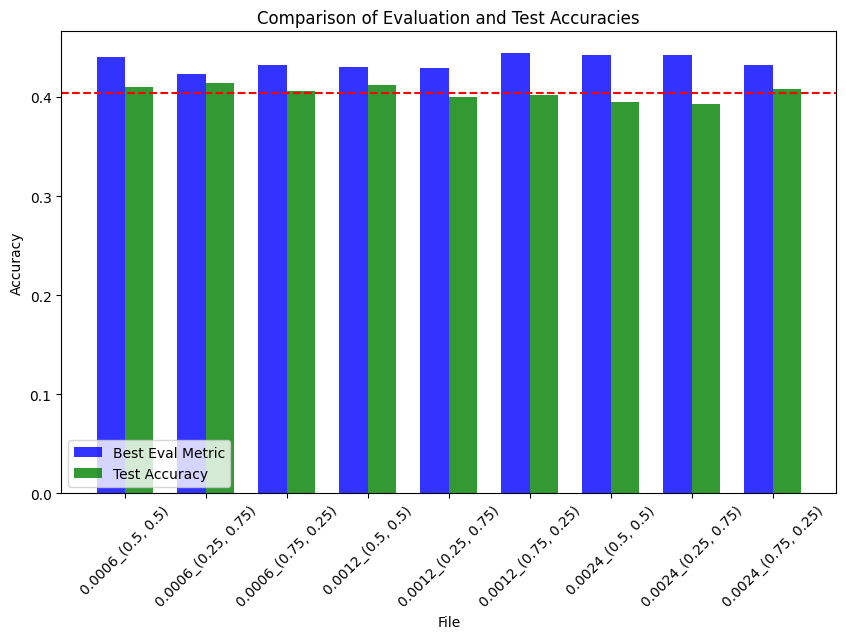

0.444
5
0.414
1
/Users/tompieper/v2logs/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json
/Users/tompieper/v2logs/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json
                  File  Best Eval Metric  Test Accuracy
0    0.0006_(0.5, 0.5)             0.440          0.410
1  0.0006_(0.25, 0.75)             0.423          0.414
2  0.0006_(0.75, 0.25)             0.432          0.406
3    0.0012_(0.5, 0.5)             0.430          0.412
4  0.0012_(0.25, 0.75)             0.429          0.400
5  0.0012_(0.75, 0.25)             0.444          0.402
6    0.0024_(0.5, 0.5)             0.442          0.395
7  0.0024_(0.25, 0.75)             0.442          0.393
8  0.0024_(0.75, 0.25)             0.432          0.408


In [167]:
eval_accuracies = []
test_accuracies = []
best_eval_accuracies = []

# Loop through each file, read the data, and extract the metrics
for path in file_names_v2:
    with open(path, 'r') as file:
        data = json.load(file)
        # Assuming the last entry in log_history contains the final eval/test metrics
        # Check for None and set a default value if necessary
        eval_accuracy = 0  # Default value if not found
        test_accuracy = 0  # Default value if not found
        best_eval_accuracy = 0  # Default value if not found
        for entry in data['log_history']:
            if 'test_label_accuracy' in entry:
                test_accuracy = entry['test_label_accuracy']
            elif 'test_exact_match_accuracy' in entry:
                test_accuracy = entry['test_exact_match_accuracy']
                
            if 'eval_label_accuracy' in entry and entry["eval_label_accuracy"] > best_eval_accuracy:
                # eval_accuracy = entry['eval_label_accuracy']
                best_eval_accuracy = entry['eval_label_accuracy']
                
        eval_accuracies.append(eval_accuracy)
        test_accuracies.append(test_accuracy)
        best_eval_accuracies.append(best_eval_accuracy)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(file_names_v2))
bar_width = 0.35
opacity = 0.8

# rects1 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Eval Accuracy')
rects2 = ax.bar(index, best_eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects3 = ax.bar([p + bar_width for p in index], test_accuracies, bar_width, alpha=opacity, color='g', label='Test Accuracy')

ax.set_xlabel('File')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(names)
ax.tick_params(axis='x', labelrotation=45)
ax.axhline(y=baseline, color='r', linestyle='--')

ax.legend(loc='lower left')

# plt.tight_layout()

plt.show()
# ghet max of best eval accuracy
print(max(best_eval_accuracies))
print(best_eval_accuracies.index(max(best_eval_accuracies)))
print(max(test_accuracies))
print(test_accuracies.index(max(test_accuracies)))

print(file_names_v2[best_eval_accuracies.index(max(best_eval_accuracies))])
print(file_names_v2[test_accuracies.index(max(test_accuracies))])



data = pd.DataFrame({'File': names, 'Best Eval Metric': best_eval_accuracies, 'Test Accuracy': test_accuracies})
print(data)


In [168]:
v3_file_paths = [
    "/Users/tompieper/v3/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/v3/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json"
]

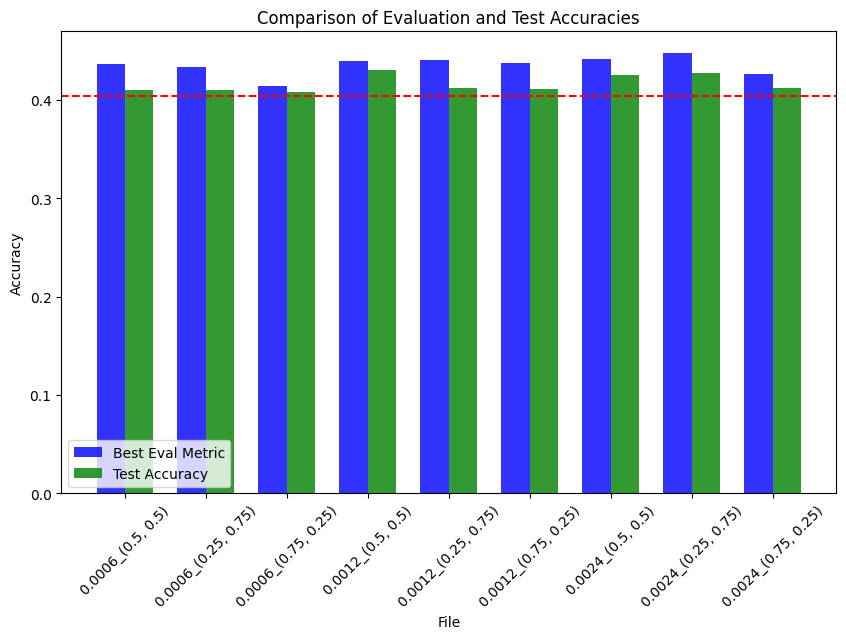

                  File  Best Eval Metric  Test Accuracy
0    0.0006_(0.5, 0.5)          0.436436          0.410
1  0.0006_(0.25, 0.75)          0.433433          0.410
2  0.0006_(0.75, 0.25)          0.414000          0.408
3    0.0012_(0.5, 0.5)          0.439000          0.430
4  0.0012_(0.25, 0.75)          0.440440          0.412
5  0.0012_(0.75, 0.25)          0.437437          0.411
6    0.0024_(0.5, 0.5)          0.441000          0.425
7  0.0024_(0.25, 0.75)          0.447000          0.427
8  0.0024_(0.75, 0.25)          0.426000          0.412


In [169]:
eval_accuracies = []
test_accuracies = []
best_eval_accuracies = []

# Loop through each file, read the data, and extract the metrics
for path in v3_file_paths:
    with open(path, 'r') as file:
        data = json.load(file)
        # Assuming the last entry in log_history contains the final eval/test metrics
        # Check for None and set a default value if necessary
        eval_accuracy = 0  # Default value if not found
        test_accuracy = 0  # Default value if not found
        best_eval_accuracy = 0  # Default value if not found
        for entry in data['log_history']:
            if 'test_label_accuracy' in entry:
                test_accuracy = entry['test_label_accuracy']
            elif 'test_exact_match_accuracy' in entry:
                test_accuracy = entry['test_exact_match_accuracy']
                
            if 'eval_label_accuracy' in entry and entry["eval_label_accuracy"] > best_eval_accuracy:
                # eval_accuracy = entry['eval_label_accuracy']
                best_eval_accuracy = entry['eval_label_accuracy']
                
        eval_accuracies.append(eval_accuracy)
        test_accuracies.append(test_accuracy)
        best_eval_accuracies.append(best_eval_accuracy)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(file_names_v2))
bar_width = 0.35
opacity = 0.8

# rects1 = ax.bar(index, eval_accuracies, bar_width, alpha=opacity, color='b', label='Eval Accuracy')
rects2 = ax.bar(index, best_eval_accuracies, bar_width, alpha=opacity, color='b', label='Best Eval Metric')
rects3 = ax.bar([p + bar_width for p in index], test_accuracies, bar_width, alpha=opacity, color='g', label='Test Accuracy')

ax.set_xlabel('File')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(names)
ax.tick_params(axis='x', labelrotation=45)
ax.axhline(y=baseline, color='r', linestyle='--')

ax.legend(loc='lower left')

# plt.tight_layout()

plt.show()
data = pd.DataFrame({'File': names, 'Best Eval Metric': best_eval_accuracies, 'Test Accuracy': test_accuracies})
print(data)

# Concatenation of all tests

In [170]:

df = pd.read_json('final_results/tests_based_on_dev_accuracy.json')
df

,Type,Metrics,Weights,Config,Best_Checkpoint,Model_Checkpoint_Best_Label_Accuracy,Results
0,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0006,checkpoint-264,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.338
1,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0012,checkpoint-660,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.391
2,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0024,checkpoint-1320,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.404
3,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.25, 0.75)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.417
4,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.25, 0.75)",checkpoint-132,/netscratch/tpieper/v2results/t5-small-weights...,0.400
5,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.25, 0.75)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.395
6,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.5, 0.5)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.401
7,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.5, 0.5)",checkpoint-1188,/netscratch/tpieper/v2results/t5-small-weights...,0.406
8,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.5, 0.5)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.409
9,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.75, 0.25)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.414


Import the other data from the current storage and append them to the df

In [171]:

filenames_baselines = [
    "/Users/tompieper/code_3/final_results/baselines/0.0006/metrics.json",
    "/Users/tompieper/code_3/final_results/baselines/0.0012/metrics.json",
    "/Users/tompieper/code_3/final_results/baselines/0.0024/metrics.json"
]

file_names_mANLI_v1 = [
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v1/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json"
]
file_names_mANLI_v2 = [
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0006_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0012_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0024_(0.25, 0.75)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0006_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0012_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0024_(0.5, 0.5)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0006_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0012_(0.75, 0.25)/metrics.json",
    "/Users/tompieper/code_3/final_results/mANLI_v2/t5-small-logs/0.0024_(0.75, 0.25)/metrics.json"
]
names_list = ["B1", "B2", "B3", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "E1", "E2", "E3", "E4", "E5", "E6", "E7", "E8", "E9"]

all_files = filenames_baselines + file_names_mANLI_v1 + file_names_mANLI_v2
print(len(all_files))

21


In [172]:
def extract_metrics_from_json(path: str):
    try:
        with open(path, 'r') as file:
            data = json.load(file)
            # Assuming the last entry in log_history contains the final eval/test metrics
            # Check for None and set a default value if necessary
            eval_accuracy = 0  # Default value if not found
            test_accuracy = 0  # Default value if not found

            for entry in data['log_history']:
                if 'test_label_accuracy' in entry:
                    test_accuracy = entry['test_label_accuracy']
                elif 'test_exact_match_accuracy' in entry:
                    test_accuracy = entry['test_exact_match_accuracy']
                    
                if 'eval_label_accuracy' in entry and entry['eval_label_accuracy'] > eval_accuracy:
                    eval_accuracy = entry['eval_label_accuracy']
                elif 'eval_exact_match_accuracy' in entry and entry['eval_exact_match_accuracy'] > eval_accuracy:
                    eval_accuracy = entry['eval_exact_match_accuracy']
                    
        return eval_accuracy, test_accuracy

    except Exception as e:
        raise Exception(f"Error reading file: {e}")
        # raise ValueError("File not found")

In [173]:
list_eval_accuracies = []
list_test_accuracies = []
for i in all_files:
    eval_acc, test_acc = extract_metrics_from_json(i)
    list_eval_accuracies.append(eval_acc)
    list_test_accuracies.append(test_acc)

In [174]:
print(list_eval_accuracies)
print(list_test_accuracies)

[0.359, 0.386, 0.409, 0.423, 0.429, 0.442, 0.44, 0.43, 0.442, 0.432, 0.444, 0.432, 0.4364364364364364, 0.44044044044044045, 0.447, 0.43343343343343343, 0.439, 0.441, 0.414, 0.43743743743743746, 0.426]
[0.317, 0.338, 0.327, 0.414, 0.4, 0.393, 0.41, 0.412, 0.395, 0.406, 0.402, 0.408, 0.41, 0.412, 0.427, 0.41, 0.43, 0.425, 0.408, 0.411, 0.412]


In [175]:
df['Test Accuracy based on loss'] = list_test_accuracies
df['Best Eval Accuracy'] = list_eval_accuracies
df = df.rename(columns={"Results": "Test Accuracy based on Exact Match"})
df['Name']= names_list


In [176]:
df

,Type,Metrics,Weights,Config,Best_Checkpoint,Model_Checkpoint_Best_Label_Accuracy,Test Accuracy based on Exact Match,Test Accuracy based on loss,Best Eval Accuracy,Name
0,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0006,checkpoint-264,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.338,0.317,0.359000,B1
1,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0012,checkpoint-660,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.391,0.338,0.386000,B2
2,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0024,checkpoint-1320,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.404,0.327,0.409000,B3
3,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.25, 0.75)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.417,0.414,0.423000,S1
4,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.25, 0.75)",checkpoint-132,/netscratch/tpieper/v2results/t5-small-weights...,0.400,0.400,0.429000,S2
5,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.25, 0.75)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.395,0.393,0.442000,S3
6,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.5, 0.5)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.401,0.410,0.440000,S4
7,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.001...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0012_(0.5, 0.5)",checkpoint-1188,/netscratch/tpieper/v2results/t5-small-weights...,0.406,0.412,0.430000,S5
8,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.002...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0024_(0.5, 0.5)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.409,0.395,0.442000,S6
9,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.75, 0.25)",checkpoint-1320,/netscratch/tpieper/v2results/t5-small-weights...,0.414,0.406,0.432000,S7


# Graph 1 
extracts the overall best performances from each type

Note def include the EMANLI dataset best loss based one as it is technically more accurate during testing but less consistent with it


In [177]:
# split the dataframe into baselines and modified
df_bl = df[df['Type'] == 'baselines']
df_mANLI_v1 = df[df['Type'] == 'modified']
df_mANLI_v2 = df[df['Type'] == 'modified_2']

df_bl_best_loss = df_bl[df_bl['Test Accuracy based on loss'] == df_bl['Test Accuracy based on loss'].max()]
df_bl_best_exact = df_bl[df_bl['Test Accuracy based on Exact Match'] == df_bl['Test Accuracy based on Exact Match'].max()] #this is the one
df_bl_best_eval = df_bl[df_bl['Best Eval Accuracy'] == df_bl['Best Eval Accuracy'].max()]

df_mANLI_v1_best_loss = df_mANLI_v1[df_mANLI_v1['Test Accuracy based on loss'] == df_mANLI_v1['Test Accuracy based on loss'].max()] # this is the one 
df_mANLI_v1_best_exact = df_mANLI_v1[df_mANLI_v1['Test Accuracy based on Exact Match'] == df_mANLI_v1['Test Accuracy based on Exact Match'].max()] # this also is the one
df_mANLI_v1_best_eval = df_mANLI_v1[df_mANLI_v1['Best Eval Accuracy'] == df_mANLI_v1['Best Eval Accuracy'].max()]



# find best value for each type in the 



df_mANLI_v2_best_loss = df_mANLI_v2[df_mANLI_v2['Test Accuracy based on loss'] == df_mANLI_v2['Test Accuracy based on loss'].max()] # this is the one
df_mANLI_v2_best_exact = df_mANLI_v2[df_mANLI_v2['Test Accuracy based on Exact Match'] == df_mANLI_v2['Test Accuracy based on Exact Match'].max()] # this is the one
df_mANLI_v2_best_eval = df_mANLI_v2[df_mANLI_v2['Best Eval Accuracy'] == df_mANLI_v2['Best Eval Accuracy'].max()]
# df_mANLI_v2_best_exact
df_mANLI_v1_best_loss # same for both scores



# concat dfs
df_graph1 = pd.concat([df_bl_best_exact, df_mANLI_v1_best_exact, df_mANLI_v2_best_exact])
df_graph1 

,Type,Metrics,Weights,Config,Best_Checkpoint,Model_Checkpoint_Best_Label_Accuracy,Test Accuracy based on Exact Match,Test Accuracy based on loss,Best Eval Accuracy,Name
2,baselines,/netscratch/tpieper/v3/baseline/logs/t5-small-...,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.0024,checkpoint-1320,/netscratch/tpieper/v3/baseline/results/t5-sma...,0.404,0.327,0.409,B3
3,modified,/netscratch/tpieper/v2logs/t5-small-logs/0.000...,/netscratch/tpieper/v2results/t5-small-weights...,"0.0006_(0.25, 0.75)",checkpoint-924,/netscratch/tpieper/v2results/t5-small-weights...,0.417,0.414,0.423,S1
14,modified_2,/netscratch/tpieper/v3/logs/t5-small-logs/0.00...,/netscratch/tpieper/v3/results/t5-small-weight...,"0.0024_(0.25, 0.75)",checkpoint-1320,/netscratch/tpieper/v3/results/t5-small-weight...,0.427,0.427,0.447,E3


In [178]:
aspargus = '#678d58'
metal = '#242f40'
jordy = '#98b9f2'

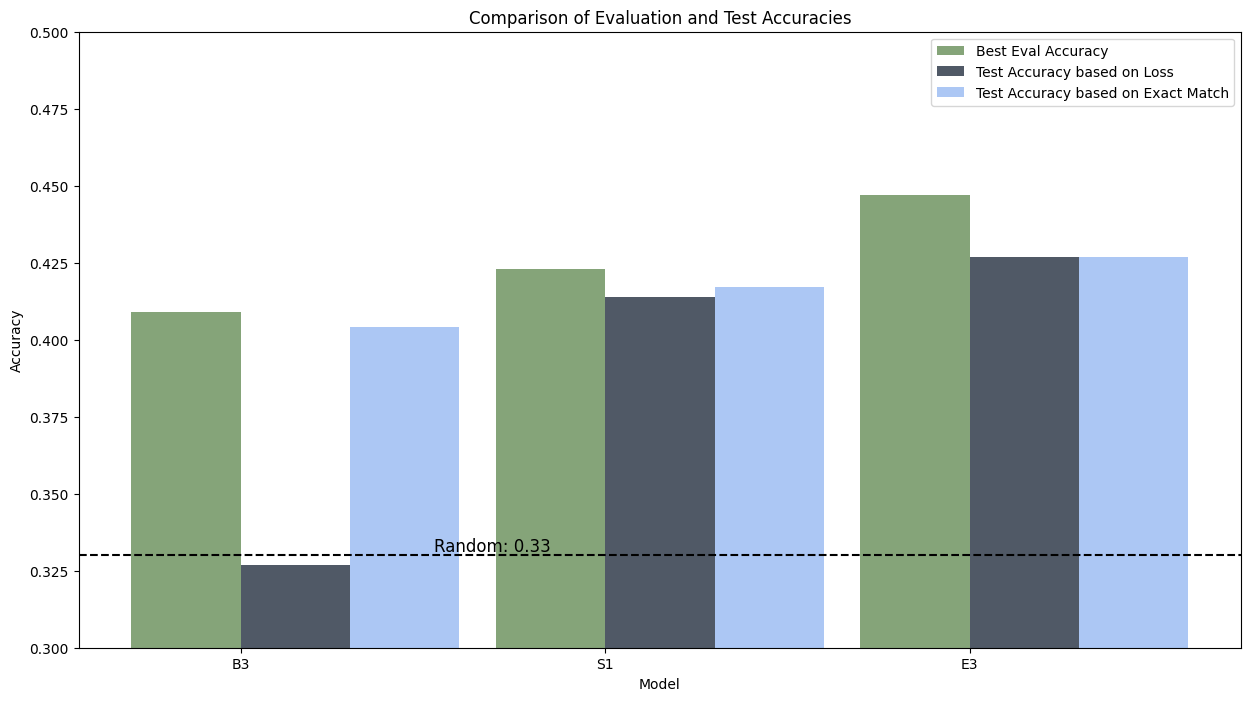

In [179]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 8))
index = range(len(df_graph1))
bar_width = 0.3
opacity = 0.8

rects1 = ax.bar(df_graph1['Name'], df_graph1['Best Eval Accuracy'], bar_width, alpha=opacity, color=aspargus, label='Best Eval Accuracy')
rects2 = ax.bar([p + bar_width for p in index], df_graph1['Test Accuracy based on loss'], bar_width, alpha=opacity, color=metal, label='Test Accuracy based on Loss')
rects3 = ax.bar([p + bar_width*2 for p in index], df_graph1['Test Accuracy based on Exact Match'], bar_width, alpha=opacity, color=jordy, label='Test Accuracy based on Exact Match')

# ax.axhline(y=best_overall_baseline, color='r', linestyle='--')
# # add label to the line
# ax.text(1, best_overall_baseline, f"Baseline: {best_overall_baseline}", fontsize=12, ha='right', va='bottom')

ax.axhline(y=0.33, color='k', linestyle='--')
# add label to the line
ax.text(1, 0.33, f"Random: 0.33", fontsize=12, ha='right', va='bottom')

# make y axis start at 0.33
plt.ylim(0.3, 0.5)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width /2 for p in index])
ax.set_xticklabels(df_graph1["Name"])
ax.tick_params(axis='x', labelrotation=0)
# ax.legend(loc='lower left')
ax.legend(loc='upper right')

plt.show()

# Graph 2 Timelines of Eval Accuracy


In [180]:
create_timeline(df_bl['Metrics'])

FileNotFoundError: [Errno 2] No such file or directory: '/netscratch/tpieper/v3/baseline/logs/t5-small-logs/0.0006/metrics.json'

<Figure size 1000x600 with 0 Axes>

In [55]:
baseline_df = df[df['Type'] == 'baselines']
best_loss_accuracy = baseline_df['Test Accuracy based on loss'].max()
best_exact_match_accuracy = baseline_df['Test Accuracy based on Exact Match'].max()

print("Best Test Accuracy based on Loss:", best_loss_accuracy)
print("Best Test Accuracy based on Exact Match:", best_exact_match_accuracy)

best_overall_baseline = max(best_loss_accuracy, best_exact_match_accuracy)
print("Best Overall Baseline:", best_overall_baseline)



v1_df = df[df['Type'] == 'modified']
best_loss_accuracy = v1_df['Test Accuracy based on loss'].max()
best_exact_match_accuracy = v1_df['Test Accuracy based on Exact Match'].max()

print("Best Test Accuracy based on Loss:", best_loss_accuracy)
print("Best Test Accuracy based on Exact Match:", best_exact_match_accuracy)

best_overall_v1 = max(best_loss_accuracy, best_exact_match_accuracy)
print("Best Overall Baseline:", best_overall_v1)




v2_df = df[df['Type'] == 'modified_2']
best_loss_accuracy = v2_df['Test Accuracy based on loss'].max()
best_exact_match_accuracy = v2_df['Test Accuracy based on Exact Match'].max()

print("Best Test Accuracy based on Loss:", best_loss_accuracy)
print("Best Test Accuracy based on Exact Match:", best_exact_match_accuracy)

best_overall_v2 = max(best_loss_accuracy, best_exact_match_accuracy)
print("Best Overall Baseline:", best_overall_v2)


Best Test Accuracy based on Loss: 0.338
Best Test Accuracy based on Exact Match: 0.404
Best Overall Baseline: 0.404
Best Test Accuracy based on Loss: 0.414
Best Test Accuracy based on Exact Match: 0.417
Best Overall Baseline: 0.417
Best Test Accuracy based on Loss: 0.43
Best Test Accuracy based on Exact Match: 0.427
Best Overall Baseline: 0.43


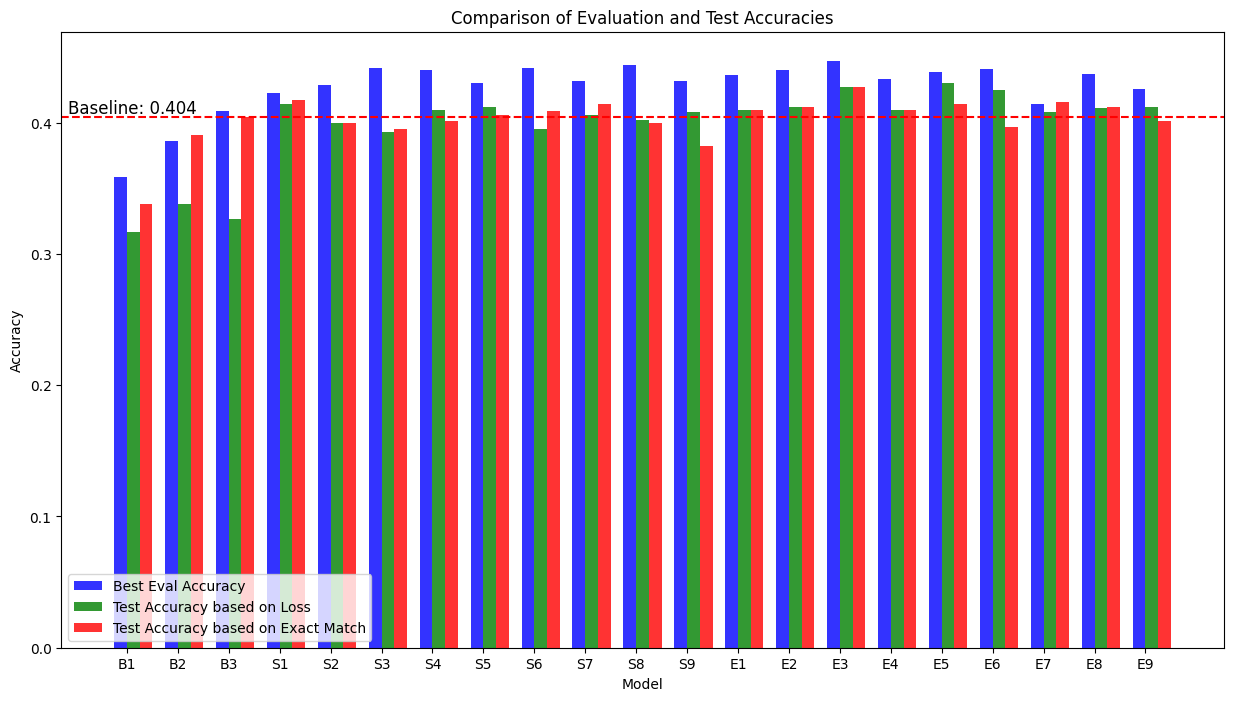

In [71]:
# plot using matplotlib: values should be results, Test Accuracy, Eval Accuracy based on Loss, X axis should be the file names
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(15, 8))
index = range(len(all_files))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(df['Name'], df['Best Eval Accuracy'], bar_width, alpha=opacity, color='b', label='Best Eval Accuracy')
rects2 = ax.bar([p + bar_width for p in index], df['Test Accuracy based on loss'], bar_width, alpha=opacity, color='g', label='Test Accuracy based on Loss')
rects3 = ax.bar([p + bar_width*2 for p in index], df['Test Accuracy based on Exact Match'], bar_width, alpha=opacity, color='r', label='Test Accuracy based on Exact Match')

ax.axhline(y=best_overall_baseline, color='r', linestyle='--')
# add label to the line
ax.text(1.5, best_overall_baseline, f"Baseline: {best_overall_baseline}", fontsize=12, ha='right', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Evaluation and Test Accuracies')
ax.set_xticks([p + bar_width /2 for p in index])
ax.set_xticklabels(df["Name"])
ax.tick_params(axis='x', labelrotation=0)
ax.legend(loc='lower left')

plt.show()
